In [649]:
include("eb.jl")
optcfg = OptConfig(MAXEVAL=10000, OPTIMIZER=:LD_SLSQP, DEBUG=true, XTOLABS = 1e-5)

OptConfig
  LOWERXB: Float64 1.0e-12
  XTOLREL: Int64 0
  XTOLABS: Float64 1.0e-5
  FTOLREL: Int64 0
  CTOLABS: Int64 0
  DEBUG: Bool true
  MAXEVAL: Int64 10000
  METHOD: Symbol softmax
  OPTIMIZER: Symbol LD_SLSQP


m = FEModel(n=30, σ=0.1) = FEModel
  f: #2420 (function of type ##2420#2426)
  n: Int64 30
  xs: StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
  ndata: Int64 100
  σ: Float64 0.1
  γ: Int64 1
  prior: Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous}

  0.074997 seconds (126.99 k allocations: 40.881 MiB, 19.78% gc time)
length(xhist) = 134
l2err(m, w) = 0.03210859220523142



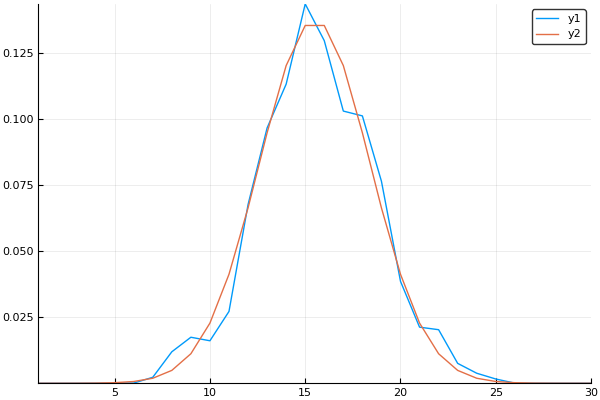

In [709]:
@show m = FEModel(n=30, σ=0.1)
ndata = 1000
reg = 100

d = generatedata(m, ndata)
@time w = ebprior(m, d,reg, optcfg)

@show length(xhist)
@show l2err(m, w)

plot(w)
plot!(wprior(m))

m = MuSigModel() = MuSigModel
  nx: Int64 20
  ny: Int64 20
  bndmu: Tuple{Int64,Int64}
  bndsig: Tuple{Float64,Float64}
  xs: Array{Tuple{Float64,Float64}}((400,))
  γ: Int64 1
  priormu: Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous}
  priorsig: Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous}

 89.041442 seconds (18.63 k allocations: 1.342 GiB, 0.64% gc time)
length(xhist) = 345



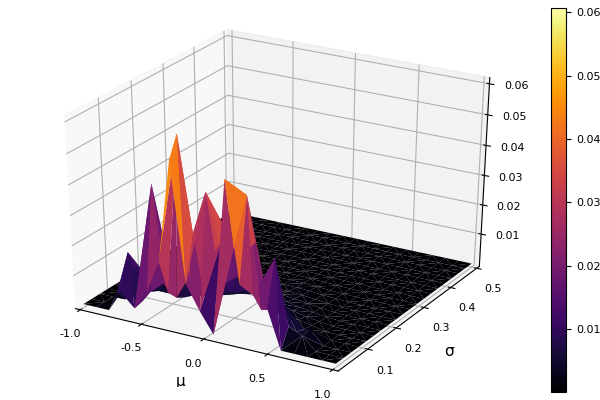

In [696]:
@show m = MuSigModel()
d = generatedata(m, 100)
@time w = ebprior(m, d, 10, optcfg)
@show length(xhist)
plot(m, w)|>display
plot(m, wprior(m))

m = MuSigModel(priormu=MixtureModel([Normal(-0.5, 0.1), Normal(0.2, 0.01)])) = MuSigModel
  nx: Int64 20
  ny: Int64 20
  bndmu: Tuple{Int64,Int64}
  bndsig: Tuple{Float64,Float64}
  xs: Array{Tuple{Float64,Float64}}((400,))
  γ: Int64 1
  priormu: Distributions.MixtureModel{Distributions.Univariate,Distributions.Continuous,Distributions.Normal{Float64}}
  priorsig: Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous}

 


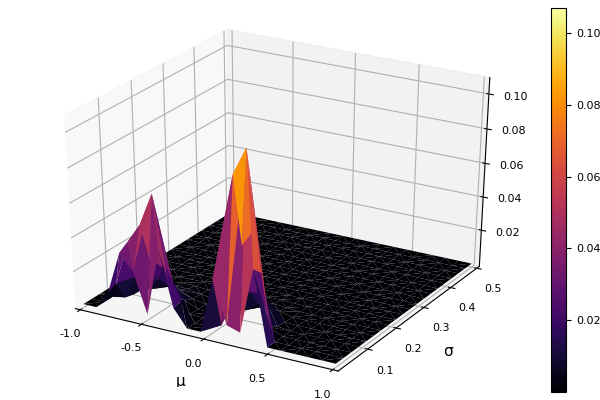

78.213032 seconds (16.52 k allocations: 1.189 GiB, 0.39% gc time)
length(xhist) = 306



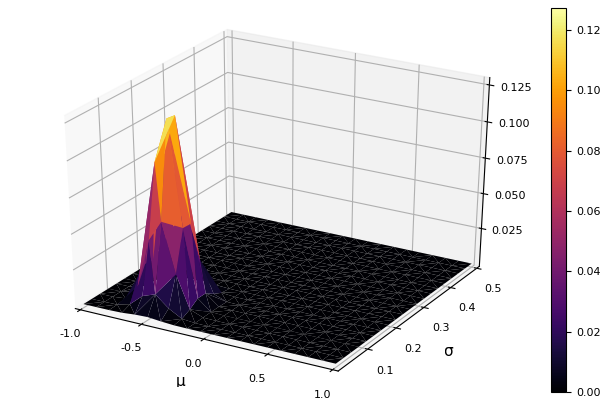

In [698]:
@show m = MuSigModel(priormu = MixtureModel([Normal(-.5, 0.1), Normal(.2, 0.01)]))
d = generatedata(m, 100)
@time w = ebprior(m, d, 10, optcfg)
@show length(xhist)
plot(m, w)|>display
plot(m, wprior(m))

m = PoissonModel(prior=Gamma(2, 1), xs=linspace(0.1, 10, 50)) = PoissonModel
  nx: Int64 20
  xs: StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
  prior: Distributions.Gamma{Float64}

  0.224357 seconds (11.78 k allocations: 104.039 MiB, 12.25% gc time)
length(xhist) = 217



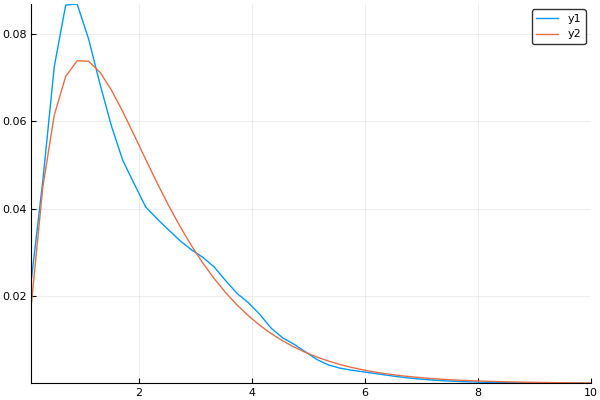

In [647]:
@show m = PoissonModel(prior=Gamma(2,1), xs = linspace(0.1,10, 50))
d = generatedata(m, 1000)
@time w = ebprior(m, d, 10, optcfg)
@show length(xhist)
plot(m, w)
plot!(m.xs, wprior(m))